## 4.9 Data Visualisation with Python (part 1)

### The script contains:

### 1. Export all libraries and dataframe

### 2. Create bar chart, histogram, scatterplot, and line chart

### 3. Create histogram for 'order_hour_of_day'

### 4. Create bar chart for the 'loyalty_flag'

### 5. Create line chart for prices by order hour of day

### 6. Create line chart for age vs number of dependant

### 7. Create scatterplot to compare age and income

### ---------------------------------------------------------------------------------------------

### 1. Export all libraries and dataframe

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# importing dataframe

path = r'/Users/queency_yustiawan/Study/CF/data analyst course/immersion/A4 exercise/Instacart Basket Analysis'

df = pd.read_pickle (os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [78]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,order_interval_days,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequenct customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequenct customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequenct customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequenct customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequenct customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### 2. Create bar chart, histogram, scatterplot, and line chart

#### Bar Chart

Text(0, 0.5, 'Number of Orders (in million)')

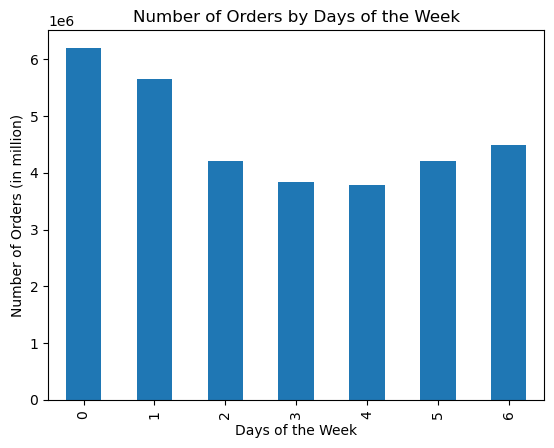

In [8]:
# Create Bar Charts for 'orders_day_of_week'
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Change the title
plt.title('Number of Orders by Days of the Week')

# Add labels
plt.xlabel('Days of the Week')
plt.ylabel('Number of Orders (in million)')

In [9]:
# Exporting the bar chart

bar.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_orders_dow2.png'))

#### Histogram and Scatterplot

<Axes: ylabel='Frequency'>

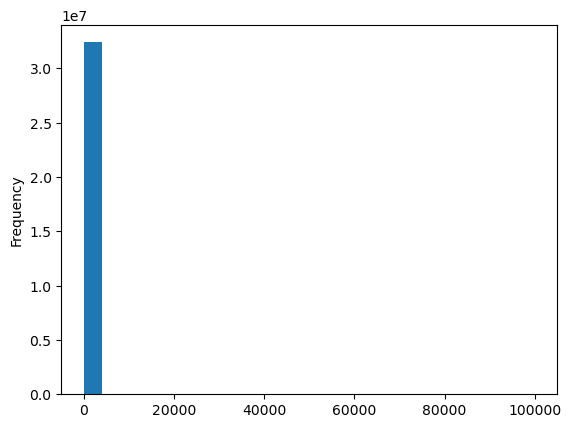

In [11]:
# Create histogram for 'prices' column

df['prices'].plot.hist(bins = 25)

In [12]:
# Checking data

df['prices'].describe( )

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

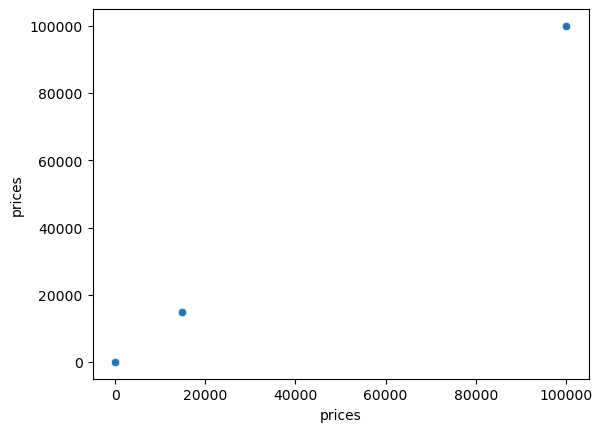

In [15]:
# Create scatterplot for 'prices' column to check the outlier

sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [17]:
# Marking the outlier as NaNs / missing data

df.loc[df['prices'] > 100, 'prices'] = np.nan

Text(0.5, 1.0, 'Histogram of Prices')

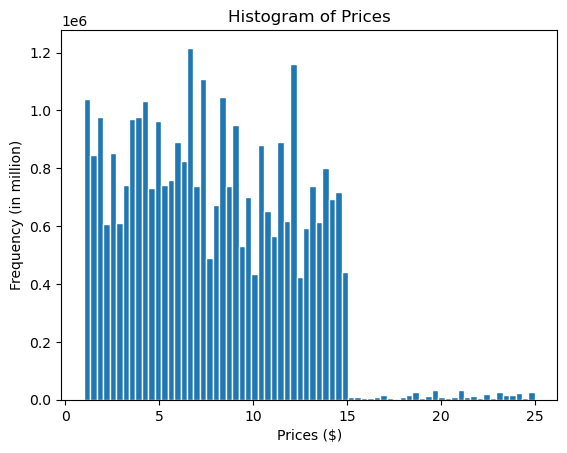

In [22]:
# Re-create the histogram
hist = df['prices'].plot.hist(bins=70, edgecolor='white')

# Add labels
plt.xlabel('Prices ($)')
plt.ylabel('Frequency (in million)')

# Change the title
plt.title('Histogram of Prices')

In [24]:
# Exporting the histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_prices.png'))

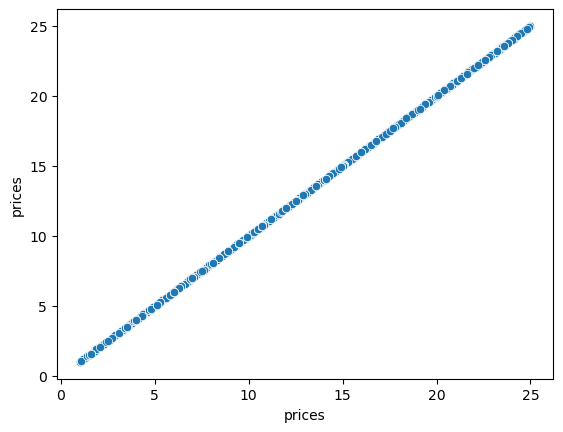

In [25]:
# Re-create the scatterplot
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [26]:
# Exporting the scatterplot

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scatter_prices.png'))

#### Line Chart

In [79]:
# Create random float numbers

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [80]:
# Split dataframe into two samples

big = df[dev]
small = df[~dev]

In [30]:
# compare dataframe length

len(df)

32404859

In [31]:
len(big) + len(small)

32404859

In [32]:
# Reducing sample based on necessary columns

df_2 = small[['orders_day_of_week', 'prices']]

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Product Prices')

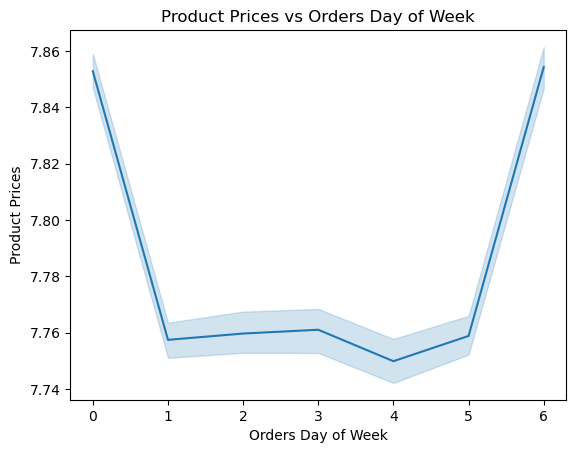

In [33]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

# Add custom chart title
plt.title('Product Prices vs Orders Day of Week')

# Update x and y axis titles
plt.xlabel('Orders Day of Week')
plt.ylabel('Product Prices')

In [35]:
# Exporting the line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_prices.png'))

### 3. Create histogram for 'order_hour_of_day'

Text(0.5, 1.0, 'Histogram: Orders by Hour of Day')

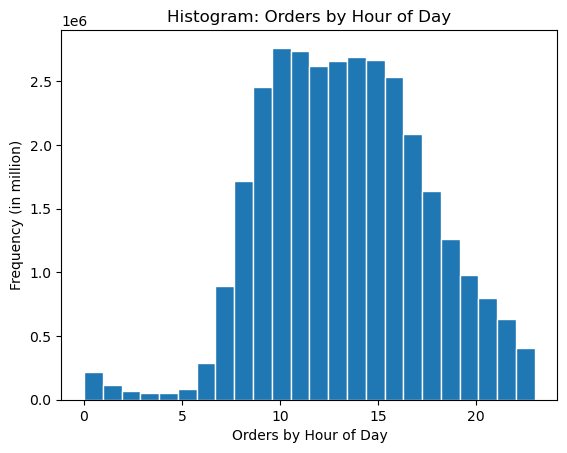

In [42]:
# Create histogram for 'order_hour_of_day'
hist_2 = df['order_hour_of_day'].plot.hist(bins = 24, edgecolor='white')

# Add labels
plt.xlabel('Orders by Hour of Day')
plt.ylabel('Frequency (in million)')

# Change the title
plt.title('Histogram: Orders by Hour of Day')

In [44]:
df['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

#### The peak time of orders are at 10am - 4pm. Off peak time are at 11pm - 6 am. The largest number of order comes in at 10am and 11am.

In [45]:
# Exporting the histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_order_hod.png'))

### 4. Create bar chart for the 'loyalty_flag'

Text(0.5, 0, 'Number of Customers (in million)')

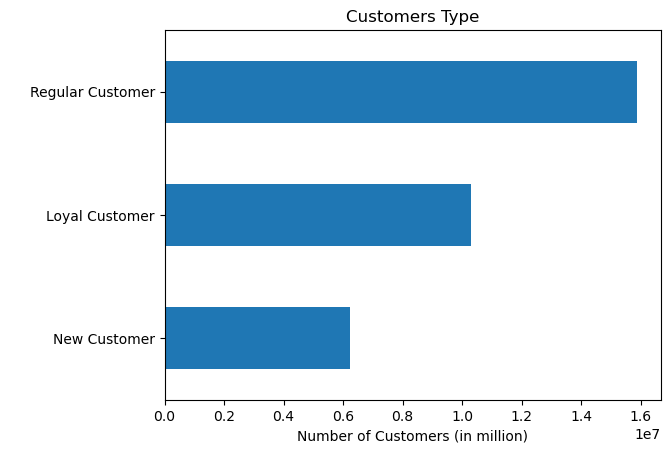

In [6]:
# Creating bar chart for the 'loyalty_flag'
bar_2 = df['loyalty_flag'].value_counts().sort_values().plot(kind ='barh')

# Change title
plt.title('Customers Type')

# Add lables
plt.ylabel(' ')
plt.xlabel('Number of Customers (in million)')

In [49]:
df['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular Customer    15876776
Loyal Customer      10284093
New Customer         6243990
Name: count, dtype: int64

In [7]:
# Exporting the bar chart

bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_customers_loyalty.png'), bbox_inches = 'tight')

### 5. Create line chart for prices by order hour of day

In [69]:
# Create sample based on necessary columns from previous small sample

df_3 = small[['order_hour_of_day', 'prices']]

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

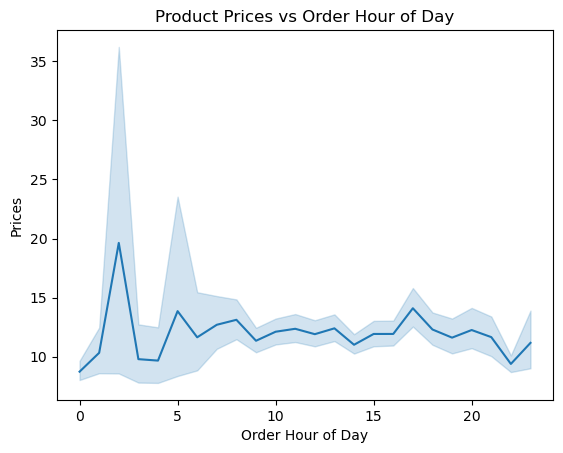

In [70]:
# Create line char for above sample
line_2 = sns.lineplot (data = df_3, x = 'order_hour_of_day', y = 'prices')

# Change title
plt.title('Product Prices vs Order Hour of Day')

# Add label
plt.xlabel('Order Hour of Day')
plt.ylabel('Prices')

In [75]:
# Exporthing the line_2 visualisation

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_prices_by_hour.png'))

### 6. Create line chart for age vs number of dependant

In [81]:
# Create sample based on necessary columns as df_4

df_4 = small[['age','number_of_dependants']]

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Dependants')

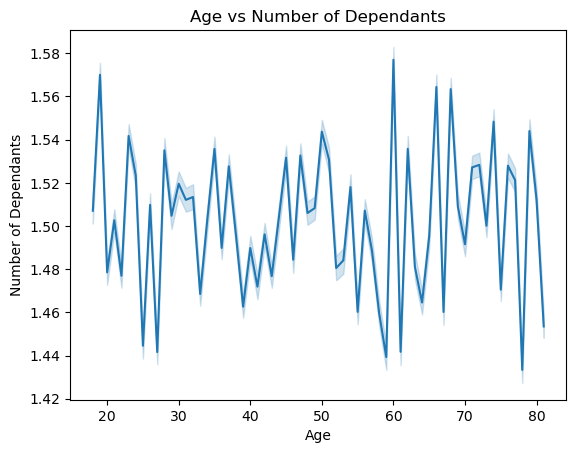

In [82]:
# Create line chart for df_4

line_3 = sns.lineplot (data = df_4, x = 'age', y = 'number_of_dependants')

# Change title
plt.title('Age vs Number of Dependants')

# Add label
plt.xlabel('Age')
plt.ylabel('Number of Dependants')

#### There does not seem any relation between age and the number of dependants in the family. The chart shows that the relationship is quite varied and no certain patterns.

In [84]:
# Exporting the line chart

line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_age_vs_dependant'))

### 7. Create scatterplot to compare age and income

Text(0, 0.5, 'Income')

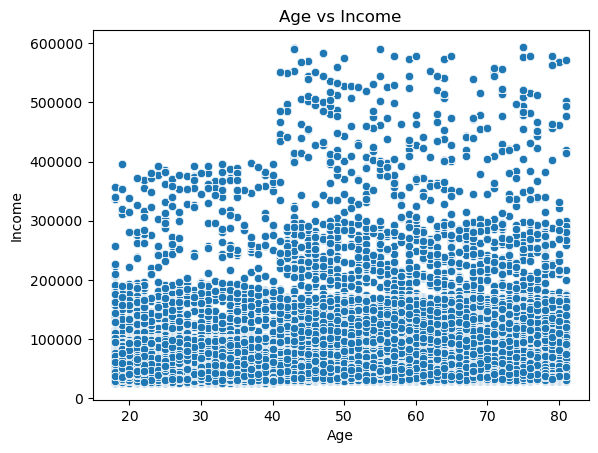

In [86]:
# Create scatterplot
scatter_2 = sns.scatterplot (x = 'age', y = 'income', data = df)

# Change title
plt.title('Age vs Income')

# Add lable
plt.xlabel('Age')
plt.ylabel('Income')

#### For the age of 20 to 40 years old, majority of the income is 200,000 and under. While for people with the age of 40 and above, the income is concentrated from 300,000 and under.

In [87]:
# Exporting the scatterplot chart

scatter_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatter_age_vs_income'))

In [89]:
# Export the df dataframe

df.to_pickle (os.path.join (path, '02 Data', 'Prepared Data', 'orders_products_customers_rev.pkl'))